In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import altair as alt
import csv

def grab_data(df, exp_names):
    load = {}
    strain = {}
    
    for exp in exp_names:
        index = df.index[df['filename'] == exp][0]
        print(index)
        
        load[exp] = [int(x) for x in df['Load'][index].replace('[', '').replace(']', '').strip().split(', ')]
        strain[exp] = [float(x) for x in df['Strain'][index].replace('[', '').replace(']', '').strip().split(', ')]
    return load, strain

def plot_strains(df, load, strain):
    plt.figure()
    ref_strain = None
    for key in load.keys():
        index = df.index[df['filename'] == key][0]
        label = ''
        if 'MR' in key:
            label = 'Mooney-Rivlin ' + r'$\mu_1$' + ' ' + str(df['-mu_1'][index]) + ' ' + r'$\mu_2$' + ' ' + str(df['-mu_2'][index]) + ' ' + r'$K$' + ' ' + str(df['-K'][index])
        else:
            label = 'Neo-Hookean ' + r'$E$' + ' ' + str(df['-E'][index]) + r'$\nu$' + ' ' + str(df['-nu'][index])
            ref_strain = strain[key][:-1]
        plt.plot(load[key], np.sqrt(strain[key][:-1]), label = label)
    
    plt.legend()
    plt.xlabel('Load Increment')
    plt.ylabel('Square root of Strain Energy')
    plt.title('Strain Energy with ' + r'$log(J)$')
    plt.savefig('log_csv/20210617_strain_plot_MRvsNH_mu1_'+ str(df['-mu_1'][index]) +'_mu2_'+ str(df['-mu_2'][index]) +'.pdf', bbox_inches = 'tight')
    
    plt.figure()
    for key in load.keys():
        if 'MR' in key:
            print(key)
            index = df.index[df['filename'] == key][0]
        
            label = 'Mooney-Rivlin ' + r'$\mu_1$' + ' ' + str(df['-mu_1'][index]) + ' ' + r'$\mu_2$' + ' ' + str(df['-mu_2'][index]) + ' ' + r'$K$' + ' ' + str(df['-K'][index])
            plt.plot(load[key], [(strain[key][x] - ref_strain[x])/ref_strain[x] for x in range(len(ref_strain))], label = label)
    
    plt.legend()
    plt.xlabel('Load Increment')
    plt.ylabel(r'$|(e - e_{NH})|/e_{NH}$')
    plt.title('Strain Energy with ' + r'$log(J)$')
    plt.savefig('log_csv/20210617_strain_plot_MRvsNH_mu1_'+ str(df['-mu_1'][index]) +'_mu2_'+ str(df['-mu_2'][index]) +'_ref.pdf', bbox_inches = 'tight')
    

In [2]:
MR_logj_mu2_index = 1
MR_logj_index = 2
NH_logj_index = 0

data = pd.read_csv('log_csv/altair_plot_MRvsNH.csv')
data.head(20)

# 20210617145436_FSInitial-NH1_NH_equiv_test, 20210617145433_FSInitial-MR1_NH_equiv_test

,Unnamed: 0,-E,-nu,-mu_1,-K,-mu_2,-problem,-bc_clamp,-bc_clamp_1_rotate,-bc_clamp_2_rotate,-bc_clamp_3_rotate,-bc_clamp_4_rotate,-bc_clamp_5_rotate,-bc_clamp_6_rotate,Configure,Load,Strain,filename
0,0,10,0.3,3.846154,8.333333,0.0,FSInitial-NH1,"1,2,3,4,5,6","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3",PETSC_ARCH=libceed --download-hdf5--download-n...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0007117585495511, 0.002847132989048, 0.0064...",libCEED/altair_plot/FSInitial-NH1_NH_equiv_tes...
1,1,10,0.3,3.846154,8.333333,0.0,FSInitial-MR1,"1,2,3,4,5,6","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3","0,0,1,0,.3",PETSC_ARCH=libceed --download-hdf5--download-n...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0003558943638452, 0.001423807773429, 0.0032...",libCEED/altair_plot/FSInitial-MR1_NH_equiv_tes...


In [3]:
# 20210617145436_FSInitial-NH1_NH_equiv_test, 20210617145433_FSInitial-MR1_NH_equiv_test
print(data.index[data['filename'] == 'libCEED/logJ_strainEnergy/20210617145436_FSInitial-NH1_NH_equiv_test/log.txt'][0])
print(data.index[data['filename'] == 'libCEED/logJ_strainEnergy/20210617145433_FSInitial-MR1_NH_equiv_test/log.txt'][0])



IndexError: index 0 is out of bounds for axis 0 with size 0

0
1
libCEED/altair_plot/FSInitial-MR1_NH_equiv_test/log.txt
0 0.0007117585495511 0.0003558943638452
1 0.002847132989048 0.001423807773429
2 0.006406419727374 0.003204430105017
3 0.01139011289968 0.005698907562162
4 0.01779890454497 0.008908837299838
5 0.02563368484892 0.01283625991715
6 0.03489554244593 0.01748364983748
7 0.045585764773 0.02285390360025
8 0.05770583846592 0.02895032609378
9 0.07125744978682 0.03577661476383
10 0.08624248507005 0.04333684183761
11 0.1026630311717 0.051635434608
12 0.120521375906 0.0606771538278
13 0.1398200084499 0.07046707026831
14 0.1605616196956 0.08101053950164
15 0.1827491025272 0.09231317497036
16 0.2063855519976 0.1043808194126
17 0.2314742653779 0.1172195147153
18 0.2580187420498 0.1308354702715
19 0.2860226832084 0.1452350299224
20 0.3154899913415 0.160424637569
21 0.3464247694482 0.1764108015388
22 0.3788313199554 0.1932000578013
23 0.4127141432905 0.2107989321242
24 0.4480779360639 0.2292139012683
25 0.4849275888109 0.2484513533206
26 0.52326

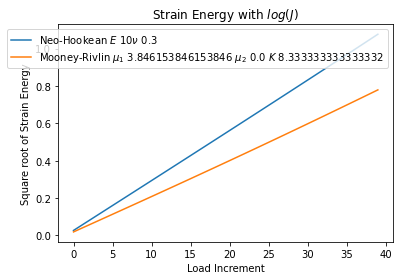

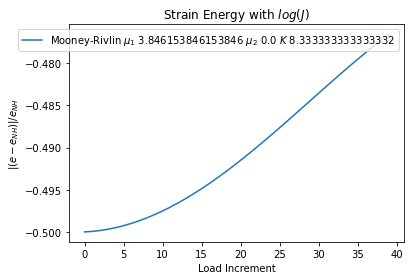

In [7]:
exp_names = [data['filename'][0], data['filename'][1]]
load, strain = grab_data(data, exp_names)
plot_strains(data, load, strain)


for i in range( len(strain[list(strain.keys())[0]]) ):
    print(i, strain[list(strain.keys())[0]][i], strain[list(strain.keys())[1]][i])

In [116]:
x_MR_jm1 = [int(x) for x in data['Load'][6].replace('[', '').replace(']', '').strip().split(', ')]
x_MR_mu = [int(x) for x in data['Load'][5].replace('[', '').replace(']', '').strip().split(', ')]
x_MR_logJ = [int(x) for x in data['Load'][4].replace('[', '').replace(']', '').strip().split(', ')]

x_NH = [int(x) for x in data['Load'][0].replace('[', '').replace(']', '').strip().split(', ')]
print(x_MR_logJ)
print(x_NH)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [65]:
y_MR_jm1 = [float(x) for x in data['Strain'][6].replace('[', '').replace(']', '').strip().split(', ')]
y_MR_mu = [float(x) for x in data['Strain'][5].replace('[', '').replace(']', '').strip().split(', ')]
y_MR_logJ = [float(x) for x in data['Strain'][4].replace('[', '').replace(']', '').strip().split(', ')]

y_NH = [float(x) for x in data['Strain'][0].replace('[', '').replace(']', '').strip().split(', ')]
print(np.sqrt(y_MR_jm1))

[0.01338921 0.0267782  0.04016671 0.05355453 0.06694141 0.08032713
 0.09371144 0.10709413 0.12047495 0.13385367 0.14723006 0.16060388
 0.1739749  0.18734289 0.20070761 0.21406884 0.22742633 0.24077985
 0.25412918 0.26747407 0.28081429 0.29414962 0.3074798  0.32080463
 0.33412385 0.34743723 0.36074455 0.37404556 0.38734004 0.40062776
 0.41390847 0.42718194 0.44044795 0.45370625 0.46695662 0.48019883
 0.49343263 0.5066578  0.5198741  0.5330813  0.5330813 ]


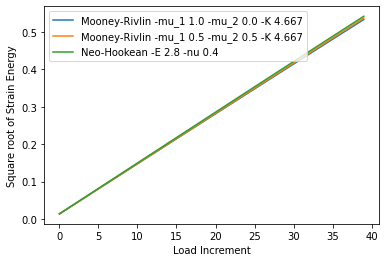

In [64]:
plt.plot(x_MR_jm1, np.sqrt(y_MR_jm1[:-1]), label = 'Mooney-Rivlin ' + '-mu_1 ' + str(data['-mu_1'][6]) + ' -mu_2 ' + str(data['-mu_2'][6]) + ' -K '+ str(data['-K'][6]))
plt.plot(x_MR_mu, np.sqrt(y_MR_mu[:-1]), label = 'Mooney-Rivlin ' + '-mu_1 ' + str(data['-mu_1'][5]) + ' -mu_2 ' + str(data['-mu_2'][5]) + ' -K '+ str(data['-K'][5]))
plt.plot(x_NH, np.sqrt(y_NH[:-1]), label = 'Neo-Hookean ' + '-E ' + str(data['-E'][0]) + ' -nu ' + str(data['-nu'][0]))
plt.legend()
plt.xlabel('Load Increment')
plt.ylabel('Square root of Strain Energy')
plt.savefig('log_csv/20210603_strain_plot_MRvsNH_mu1_0.5_mu2_0.5_sqrt.pdf', bbox_inches = 'tight')

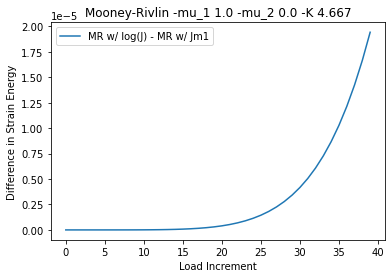

In [63]:
diff = [y_MR_logJ[i] - y_MR_jm1[i] for i in range(len(y_MR_logJ[:-1]))]
plt.plot(x_MR_logJ, diff, label = 'MR w/ log(J) - MR w/ Jm1')

plt.legend()
plt.ticklabel_format(axis='y', style='scientific')
plt.title('Mooney-Rivlin -mu_1 ' + str(data['-mu_1'][6]) + ' -mu_2 ' + str(data['-mu_2'][6]) + ' -K '+ str(data['-K'][6]))
plt.xlabel('Load Increment')
plt.ylabel('Difference in Strain Energy')
plt.savefig('log_csv/20210607_strain_plot_MRvsNH_JstabilityDiff.pdf', bbox_inches = 'tight')

In [59]:
import csv

with open('strainEnergy_vs_loadIncrement_params.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    
    spamwriter.writerow(['Parameter', 'Neo-Hookean J - 1', "Mooney-Rivlin J - 1", "Mooney-Rivlin J - 1 (2)",  'Mooney-Rivlin log(J)'])
    spamwriter.writerow([r'$E$', data['-E'][0], data['-E'][6], data['-E'][5], data['-E'][4]])
    spamwriter.writerow([r'$\nu$', data['-nu'][0], data['-nu'][6], data['-nu'][5], data['-nu'][4]])
    spamwriter.writerow([r'$\mu_1$', data['-mu_1'][0], data['-mu_1'][6], data['-mu_1'][5], data['-mu_1'][4]])
    spamwriter.writerow([r'$\mu_2$', data['-mu_2'][0], data['-mu_2'][6], data['-mu_2'][5], data['-mu_2'][4]])
    spamwriter.writerow([r'$K$', data['-K'][0], data['-K'][6], data['-K'][5], data['-K'][4]])
    

with open('strainEnergy_vs_loadIncrement_data.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    
    spamwriter.writerow(['Load Increment', 'Neo-Hookean J - 1', "Mooney-Rivlin J - 1", "Mooney-Rivlin J - 1 (2)", 'Mooney-Rivlin log(J)'])

    for i in range(len(y_NH[:-1])):
        spamwriter.writerow([x_NH[i], y_NH[i], y_MR_Jm1[i], y_MR_mu[i], y_MR_logJ[i]])

In [60]:
pd.read_csv('strainEnergy_vs_loadIncrement_params.csv').head(10)

,Parameter,Neo-Hookean J - 1,Mooney-Rivlin J - 1,Mooney-Rivlin J - 1 (2),Mooney-Rivlin log(J)
0,$E$,2.800,2.800,2.800,2.800
1,$\nu$,0.400,0.400,0.400,0.400
2,$\mu_1$,1.000,1.000,0.500,1.000
3,$\mu_2$,0.000,0.000,0.500,0.000
4,$K$,4.667,4.667,4.667,4.667


In [61]:
pd.read_csv('strainEnergy_vs_loadIncrement_data.csv').head(10)

,Load Increment,Neo-Hookean J - 1,Mooney-Rivlin J - 1,Mooney-Rivlin J - 1 (2),Mooney-Rivlin log(J)
0,0,0.000185,0.000179,0.000181,0.000179
1,1,0.000740,0.000717,0.000723,0.000717
2,2,0.001665,0.001613,0.001626,0.001613
3,3,0.002961,0.002868,0.002891,0.002868
4,4,0.004626,0.004481,0.004518,0.004481
5,5,0.006661,0.006452,0.006505,0.006452
6,6,0.009065,0.008782,0.008855,0.008782
7,7,0.011839,0.011469,0.011565,0.011469
8,8,0.014983,0.014514,0.014636,0.014514
9,9,0.018495,0.017917,0.018069,0.017917
